In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)


t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [25]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 9,  6,  3,  8,  0, 10,  7,  5,  2]), tensor([1, 4]))

In [26]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [28]:
t_u_train.shape

torch.Size([9, 1])

In [4]:
import torch.nn as nn

# linear_model = nn.Linear(1,1)
# linear_model(t_un_val)


In [24]:
linear_model.weight.shape


torch.Size([1, 1])

In [9]:
list(linear_model.parameters())


[Parameter containing:
 tensor([[0.9181]], requires_grad=True),
 Parameter containing:
 tensor([0.3509], requires_grad=True)]

In [11]:
optimizer = optim.SGD(linear_model.parameters(),lr = 1e-2)


In [19]:
# 使用nn时的循环
def traing_loop(n_epoch,optimizer,model,loss_fn,t_u_train,t_u_val,t_c_train,t_c_val):
    for epoch in range(1,n_epoch+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train,t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val,t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 ==0:
            print(f"Epoch {epoch},Training loss {loss_train.item():.4f},"
                  f"Validation loss {loss_val.item():.4f}")

In [20]:
linear_model = nn.Linear(1,1)                           # 引用模型时也初始化了参数
optimizer = optim.SGD(linear_model.parameters(),lr = 1e-2)

traing_loop(n_epoch=3000,optimizer=optimizer,
           model = linear_model,loss_fn=nn.MSELoss(),
           t_u_train=t_un_train,t_u_val=t_un_val,
           t_c_train=t_c_train,t_c_val=t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1,Training loss 53.4151,Validation loss 204.2742
Epoch 1000,Training loss 4.2152,Validation loss 17.4395
Epoch 2000,Training loss 3.0067,Validation loss 7.6639
Epoch 3000,Training loss 2.9182,Validation loss 5.7012

Parameter containing:
tensor([[4.9297]], requires_grad=True)
Parameter containing:
tensor([-15.0811], requires_grad=True)


In [21]:
# 将线性模型替换为神经网络模型



In [22]:
seq_model = nn.Sequential(nn.Linear(1,13),nn.Tanh(),nn.Linear(13,1))

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [23]:
# 看一下网络中的参数
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [30]:
#通过显示序号的方式

for name,param in seq_model.named_parameters():
    print(name,param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [33]:
# 为每一层添加name

from collections import OrderedDict

seq_model =nn.Sequential(OrderedDict([
    ('hidden_linear',nn.Linear(1,8)),
    ('hidden_activation',nn.Tanh()),
    ('output_linear',nn.Linear(8,1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [34]:
for name,param in seq_model.named_parameters():
    print(name,param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [35]:
optimizer = optim.SGD(seq_model.parameters(),lr = 1e-2)

traing_loop(n_epoch=5000,optimizer=optimizer,
           model = seq_model,loss_fn=nn.MSELoss(),
           t_u_train=t_un_train,t_u_val=t_un_val,
           t_c_train=t_c_train,t_c_val=t_c_val)

print('ouput',seq_model(t_un_val))
print('answer',t_c_val)
print('hidden',seq_model.hidden_linear.weight.grad)

Epoch 1,Training loss 190.4733,Validation loss 154.1533
Epoch 1000,Training loss 4.4755,Validation loss 9.4510
Epoch 2000,Training loss 2.2093,Validation loss 5.9661
Epoch 3000,Training loss 1.7019,Validation loss 3.7018
Epoch 4000,Training loss 1.4839,Validation loss 2.9160
Epoch 5000,Training loss 1.3770,Validation loss 2.6897
ouput tensor([[13.0862],
        [13.2522]], grad_fn=<AddmmBackward>)
answer tensor([[14.],
        [11.]])
hidden tensor([[ 4.7889e+00],
        [ 5.2126e+00],
        [-2.6709e-01],
        [-2.5762e-01],
        [ 5.9991e+00],
        [ 7.8793e-05],
        [ 1.9324e-01],
        [ 5.4420e+00]])


In [36]:
# 与线性模型比较

from matplotlib import pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (70, 1) and (1,)

/home/lzhao/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lzhao/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27663 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lzhao/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 21326 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/lzhao/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 27663 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/lzhao/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lzhao/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runt

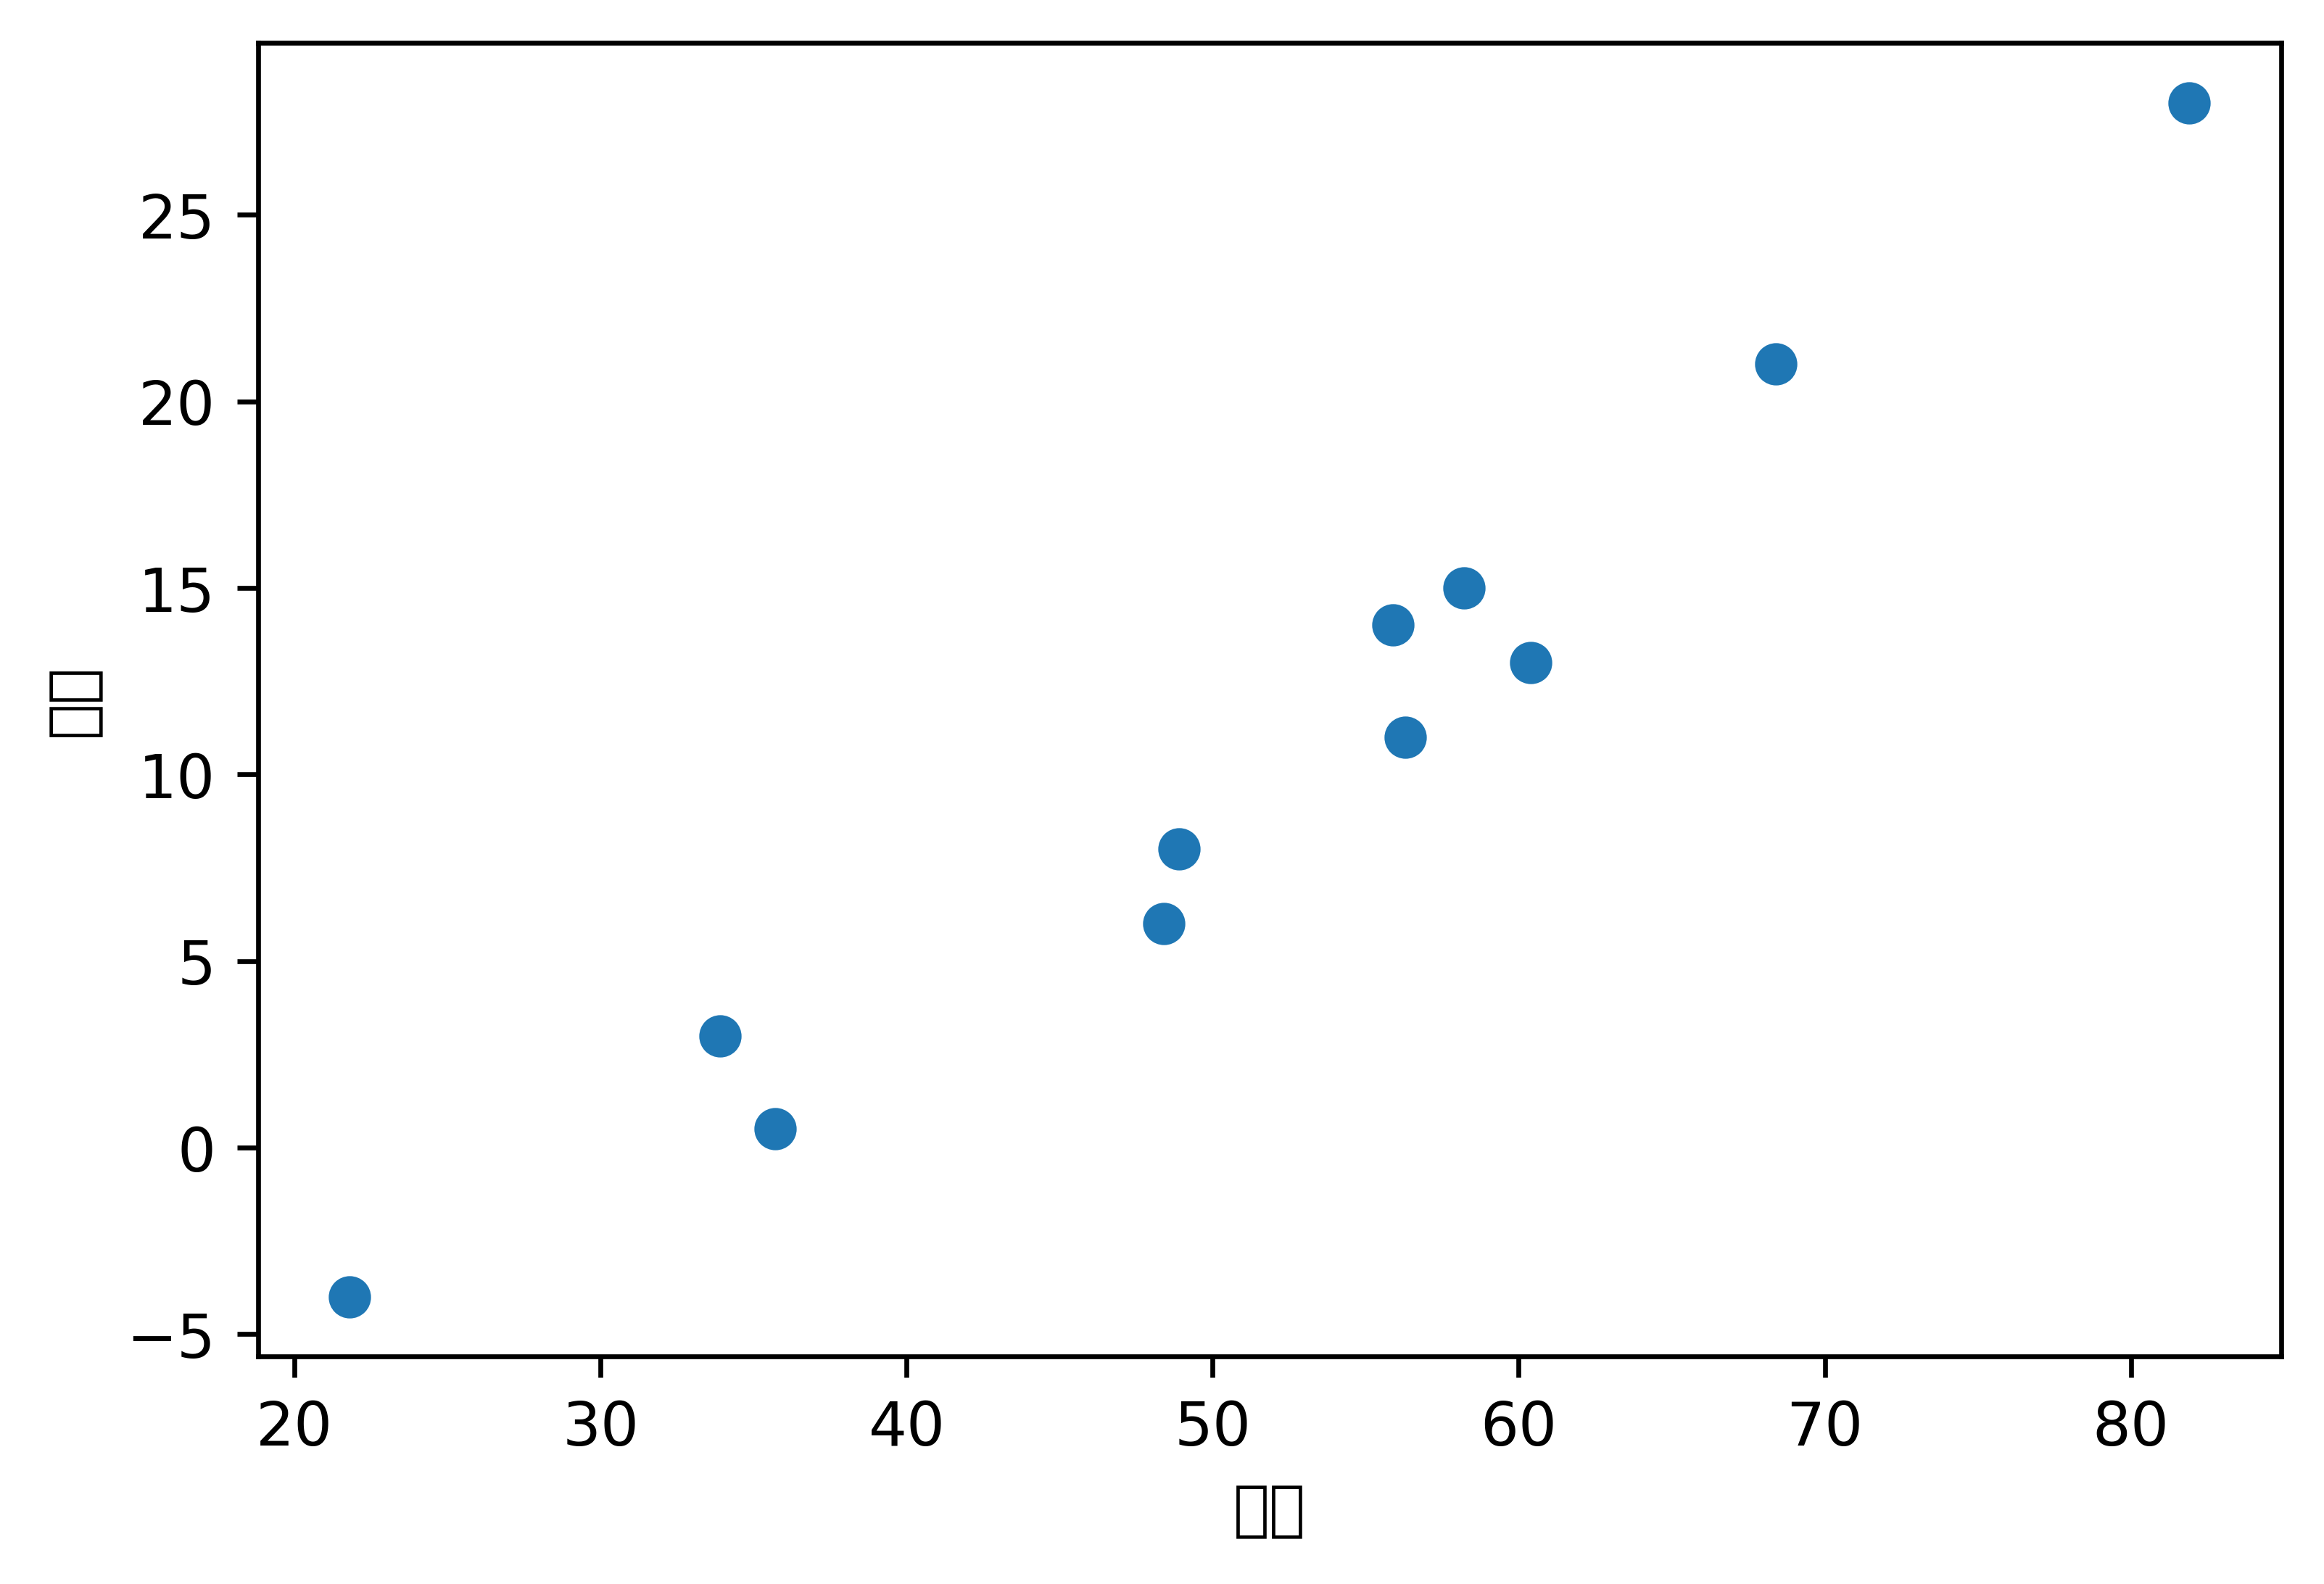

In [41]:
t_range = torch.arange(20.,90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel('华氏')
plt.ylabel('摄氏')
plt.plot(t_u.numpy(),t_c.numpy(),'o')
plt.plot(t_range.numpy(),seq_model(0.1*t_range).detach().numpy,'c-')